### Data Transformation

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [100]:
pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


### Check if there are highly correlated features and drop them (if there are any)

In [101]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [102]:
categorical = df.select_dtypes(include=['object', 'category'])
numerical = df.select_dtypes(include=['int', 'float'])
print("Categorical variables:")
print(categorical.columns)
print("\nNumerical variables:")
print(numerical.columns)

Categorical variables:
Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

Numerical variables:
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


In [103]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [104]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [105]:
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.003732   
income                                        0.003732  1.000000   
monthly_premium_auto                          0.404235 -0.002431   
months_since_last_claim                       0.011912 -0.026564   
months_since_policy_inception                 0.017055  0.003846   
number_of_open_complaints                    -0.032371  0.018903   
number_of_policies                            0.016789 -0.004461   
total_claim_amount                            0.232849 -0.111221   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404235                 0.011912   
income                                    -0.002431                -0.026564   
monthly_premium_auto                       1.000000                 0.010036   
months_since_last_claim                    0.010036                

C:\Users\ivann\AppData\Local\Temp\ipykernel_4440\3231934710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [106]:
correlation = numerical.corr().abs()
threshold = 0.8
highly_correlated = (correlation_matrix > threshold).sum() - 1
highly_correlated = highly_correlated[highly_correlated > 0]
if not highly_correlated.empty:
    print("Highly correlated features:")
    print(highly_correlated)
else:
    print("No highly correlated features found.")

No highly correlated features found.


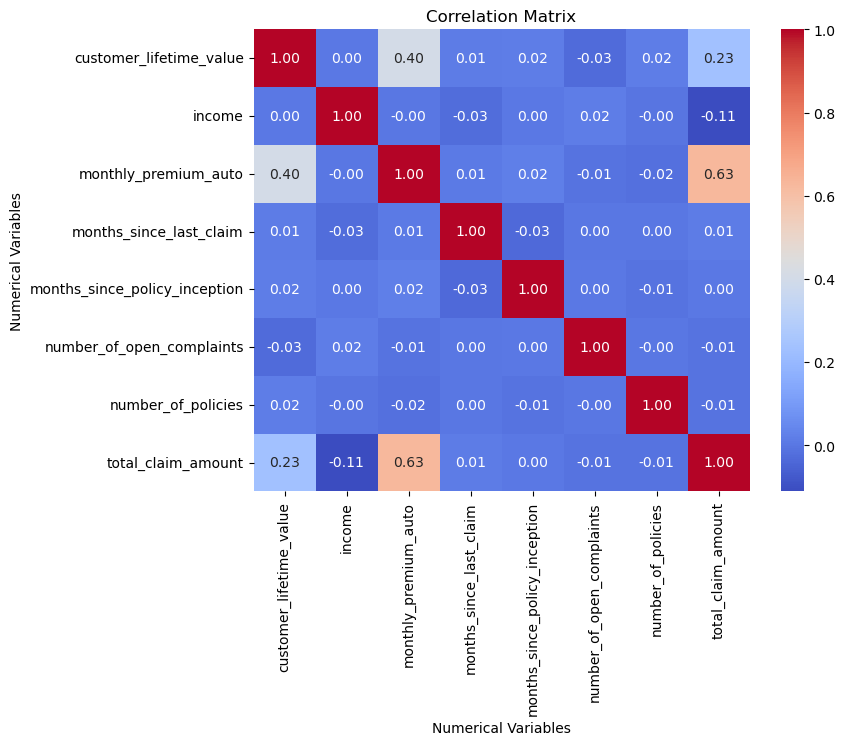

In [107]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Set plot title and labels
plt.title('Correlation Matrix')
plt.xlabel('Numerical Variables')
plt.ylabel('Numerical Variables')
# Display the plot
plt.show()

In [108]:
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

# Select the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns)

# Print the scaled DataFrame
print(scaled_df)

       customer_lifetime_value    income  monthly_premium_auto  \
0                     0.035750  0.422396              0.000000   
1                     0.004053  0.914158              0.012658   
2                     0.160254  0.134550              0.164557   
3                     0.250949  0.434059              0.151899   
4                     0.087526  0.151628              0.236287   
...                        ...       ...                   ...   
10684                 0.167819  0.572623              0.810127   
10685                 0.041276  0.568231              0.016878   
10686                 0.270119  0.331317              0.590717   
10687                 0.123706  0.602130              0.409283   
10688                 0.060901  0.654907              0.168776   

       months_since_last_claim  months_since_policy_inception  \
0                     0.200000                       0.525253   
1                     0.085714                       0.262626   
2           

### One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [109]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the categorical DataFrame
categoricals = categorical
# One-hot encoding using get_dummies()
one_hot_encoded = pd.get_dummies(categoricals, drop_first=True)

# Label encoding using LabelEncoder
label_encoder = LabelEncoder()
label_encoded = categoricals.copy()
for column in label_encoded.columns:
    label_encoded[column] = label_encoder.fit_transform(label_encoded[column])

# Print the encoded DataFrames
print("One-Hot Encoded:\n", one_hot_encoded)
print("\nLabel Encoded:\n", label_encoded)

One-Hot Encoded:
        region_east  region_north west  region_west region  response_yes  \
0                0                  0                   0             0   
1                0                  0                   1             0   
2                1                  0                   0             0   
3                0                  1                   0             1   
4                0                  1                   0             0   
...            ...                ...                 ...           ...   
10684            0                  0                   0             0   
10685            0                  1                   0             0   
10686            0                  0                   0             0   
10687            0                  0                   1             0   
10688            0                  0                   0             0   

       coverage_extended  coverage_premium  education_college  \
0               

In [110]:
#other possibility
dummy_nominals = ['region',  'response','effective_to_date', 'employment_status','marital_status','gender', 'policy_type']
final_data = pd.get_dummies(categorical, columns=dummy_nominals)

final_data

,coverage,education,month,location_code,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region_central,...,employment_status_retired,employment_status_unemployed,marital_status_divorced,marital_status_married,marital_status_single,gender_f,gender_m,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto
0,basic,college,feb,suburban,corporate l3,offer3,agent,four-door car,medsize,1,...,0,0,0,1,0,0,1,1,0,0
1,basic,college,jan,suburban,personal l3,offer4,call center,four-door car,medsize,0,...,0,1,0,0,1,1,0,0,1,0
2,basic,bachelor,feb,suburban,personal l3,offer3,call center,suv,medsize,0,...,0,0,0,0,1,0,1,0,1,0
3,extended,college,jan,suburban,corporate l3,offer2,branch,four-door car,medsize,0,...,0,0,0,0,1,0,1,1,0,0
4,premium,bachelor,jan,suburban,personal l2,offer1,branch,four-door car,medsize,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,jan,suburban,personal l1,offer3,web,luxury car,medsize,1,...,0,1,0,1,0,1,0,0,1,0
10685,basic,college,jan,urban,personal l3,offer2,branch,four-door car,medsize,0,...,0,0,0,1,0,1,0,0,1,0
10686,extended,bachelor,feb,rural,corporate l3,offer1,web,luxury suv,medsize,1,...,0,0,0,1,0,1,0,1,0,0
10687,premium,college,feb,urban,personal l1,offer1,branch,suv,medsize,0,...,0,0,1,0,0,1,0,0,1,0


In [111]:
label_ordinals = ['coverage', "month", 'education','location_code','policy','renew_offer_type', 'sales_channel','vehicle_class', 'vehicle_size']
label_encoder = LabelEncoder()

for column in label_ordinals:
    final_data[column] = label_encoder.fit_transform(final_data[column])

final_data

,coverage,education,month,location_code,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region_central,...,employment_status_retired,employment_status_unemployed,marital_status_divorced,marital_status_married,marital_status_single,gender_f,gender_m,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto
0,0,1,0,1,2,2,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
1,0,1,1,1,5,3,2,0,1,0,...,0,1,0,0,1,1,0,0,1,0
2,0,0,0,1,5,2,2,4,1,0,...,0,0,0,0,1,0,1,0,1,0
3,1,1,1,1,2,1,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
4,2,0,1,1,4,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,1,1,3,2,3,1,1,1,...,0,1,0,1,0,1,0,0,1,0
10685,0,1,1,2,5,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
10686,1,0,0,0,2,0,3,2,1,1,...,0,0,0,1,0,1,0,1,0,0
10687,2,1,0,2,3,0,1,4,1,0,...,0,0,1,0,0,1,0,0,1,0


### 1. varA Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a displot or a histogram

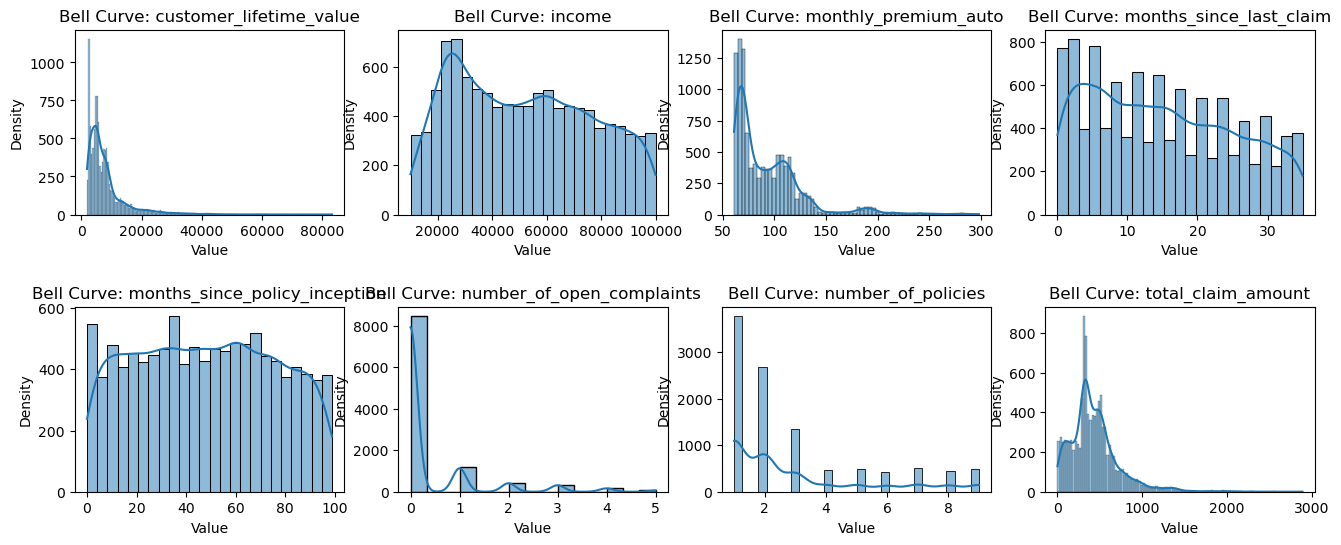

In [112]:
from scipy import stats
import math
num_columns = numerical.shape[1]
num_rows = math.ceil(num_columns / 4)
fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 3))
fig.subplots_adjust(hspace=0.5)
for i, column in enumerate(numerical.columns):
    row = i // 4
    col = i % 4
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.histplot(numerical[column], kde=True, ax=ax)
    ax.set_title(f'Bell Curve: {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
if num_columns % 4 != 0:
    for j in range(num_columns % 4, 4):
        fig.delaxes(axes[-1, j] if num_rows > 1 else axes[j])
plt.show()

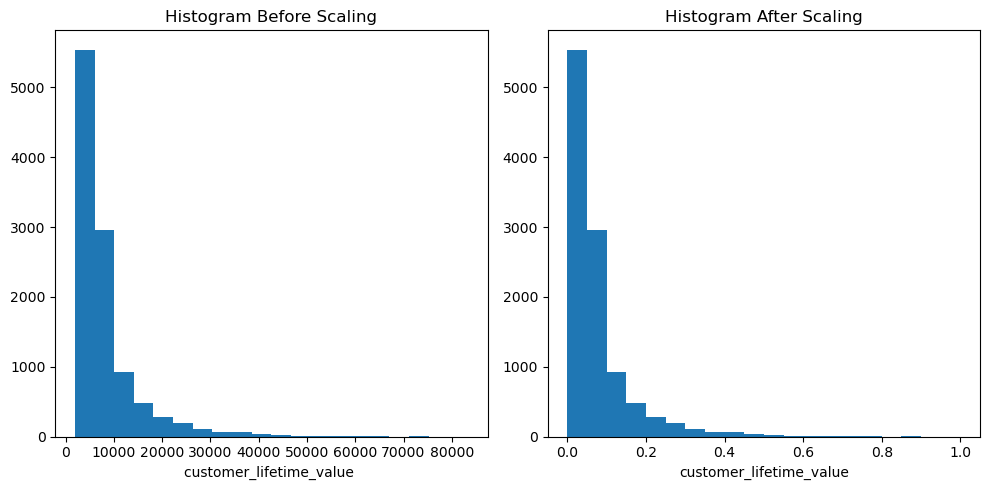

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

# Select the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Plot histograms before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(numerical_columns['customer_lifetime_value'], bins=20)
plt.title('Histogram Before Scaling')
plt.xlabel('customer_lifetime_value ')

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns)

# Plot histograms after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_df['customer_lifetime_value'], bins=20)
plt.title('Histogram After Scaling')
plt.xlabel('customer_lifetime_value')

plt.tight_layout()
plt.show()

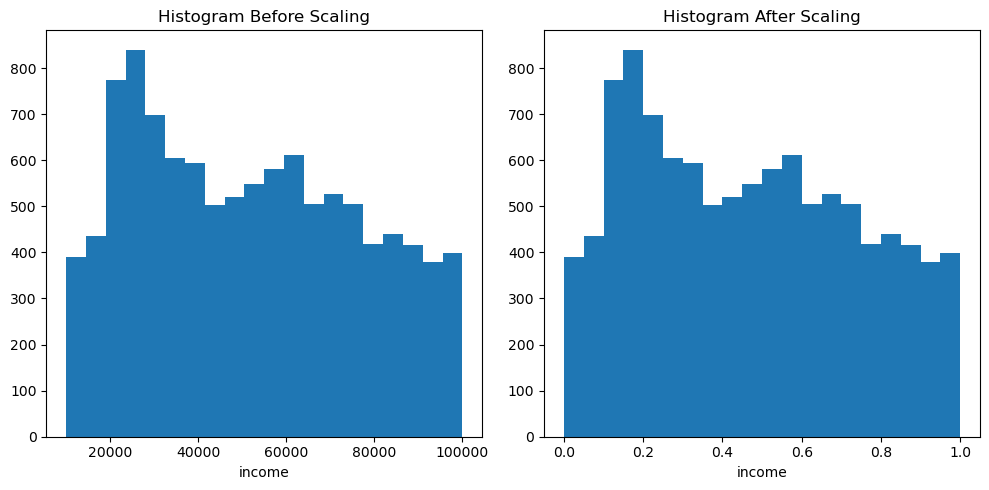

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

# Select the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Plot histograms before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(numerical_columns['income'], bins=20)
plt.title('Histogram Before Scaling')
plt.xlabel('income')

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns)

# Plot histograms after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_df['income'], bins=20)
plt.title('Histogram After Scaling')
plt.xlabel('income')

plt.tight_layout()
plt.show()

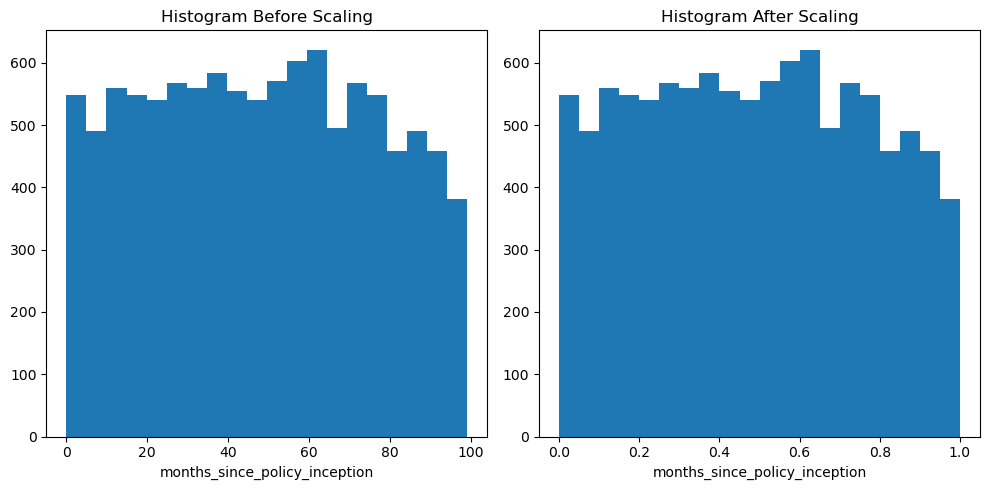

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

# Select the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Plot histograms before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(numerical_columns['months_since_policy_inception'], bins=20)
plt.title('Histogram Before Scaling')
plt.xlabel('months_since_policy_inception')

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns)

# Plot histograms after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_df['months_since_policy_inception'], bins=20)
plt.title('Histogram After Scaling')
plt.xlabel('months_since_policy_inception')

plt.tight_layout()
plt.show()


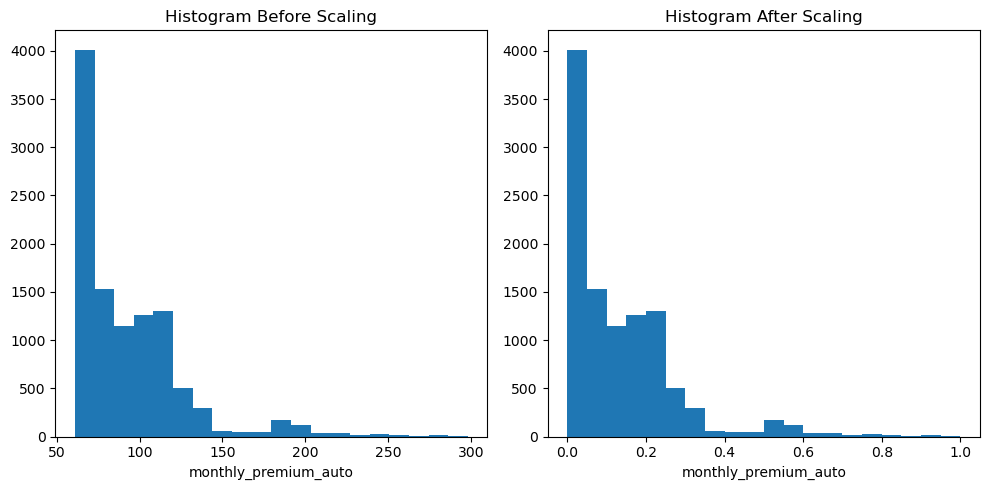

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

# Select the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Plot histograms before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(numerical_columns['monthly_premium_auto'], bins=20)
plt.title('Histogram Before Scaling')
plt.xlabel('monthly_premium_auto')

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns)

# Plot histograms after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_df['monthly_premium_auto'], bins=20)
plt.title('Histogram After Scaling')
plt.xlabel('monthly_premium_auto')

plt.tight_layout()
plt.show()

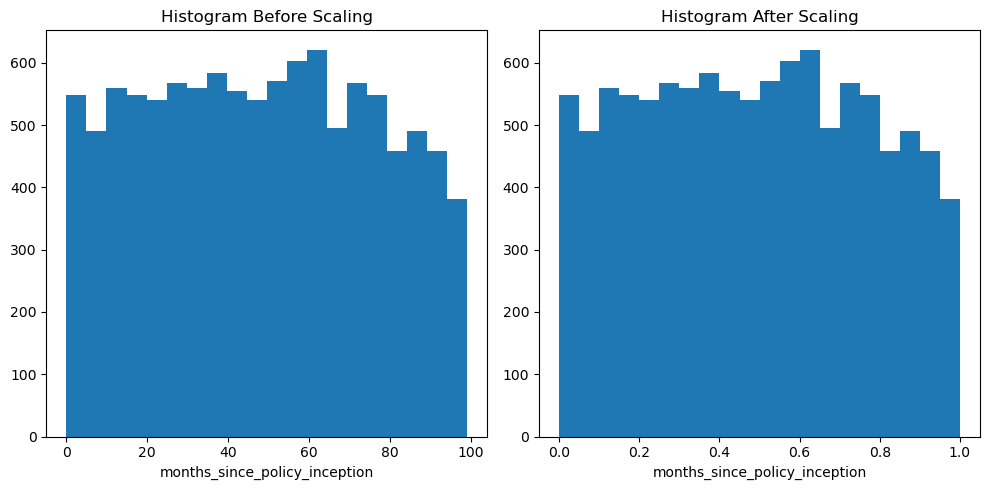

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

# Select the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Plot histograms before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(numerical_columns['months_since_policy_inception'], bins=20)
plt.title('Histogram Before Scaling')
plt.xlabel('months_since_policy_inception')

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns)

# Plot histograms after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_df['months_since_policy_inception'], bins=20)
plt.title('Histogram After Scaling')
plt.xlabel('months_since_policy_inception')

plt.tight_layout()
plt.show()

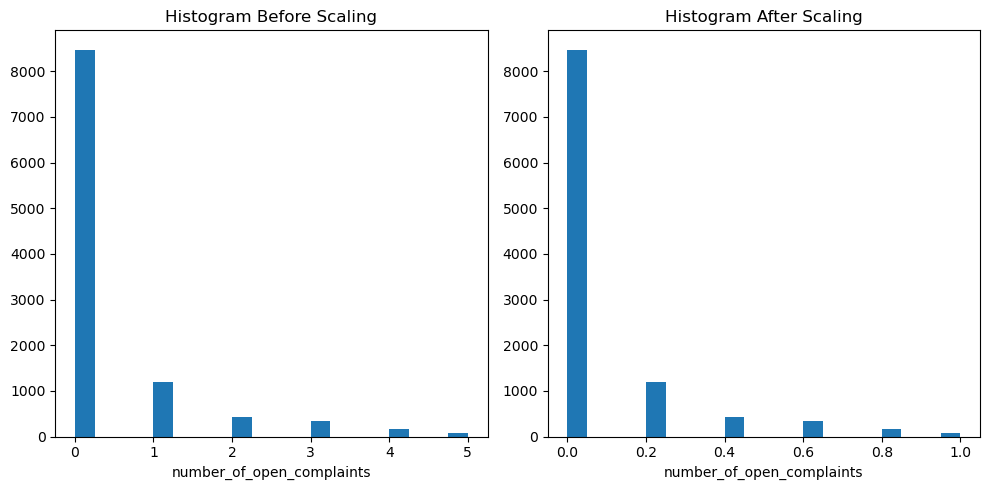

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

# Select the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Plot histograms before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(numerical_columns['number_of_open_complaints'], bins=20)
plt.title('Histogram Before Scaling')
plt.xlabel('number_of_open_complaints')

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns)

# Plot histograms after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_df['number_of_open_complaints'], bins=20)
plt.title('Histogram After Scaling')
plt.xlabel('number_of_open_complaints')

plt.tight_layout()
plt.show()

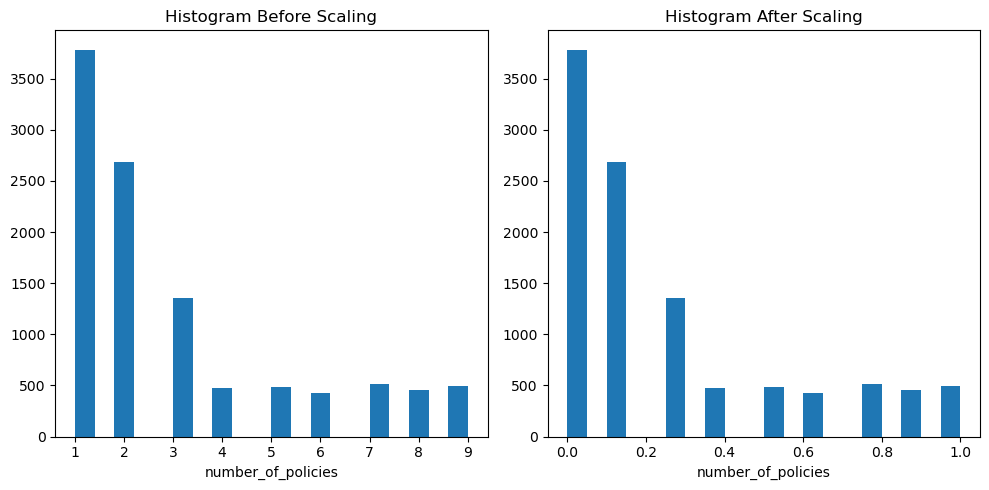

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

# Select the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Plot histograms before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(numerical_columns['number_of_policies'], bins=20)
plt.title('Histogram Before Scaling')
plt.xlabel('number_of_policies')

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns)

# Plot histograms after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_df['number_of_policies'], bins=20)
plt.title('Histogram After Scaling')
plt.xlabel('number_of_policies')

plt.tight_layout()
plt.show()

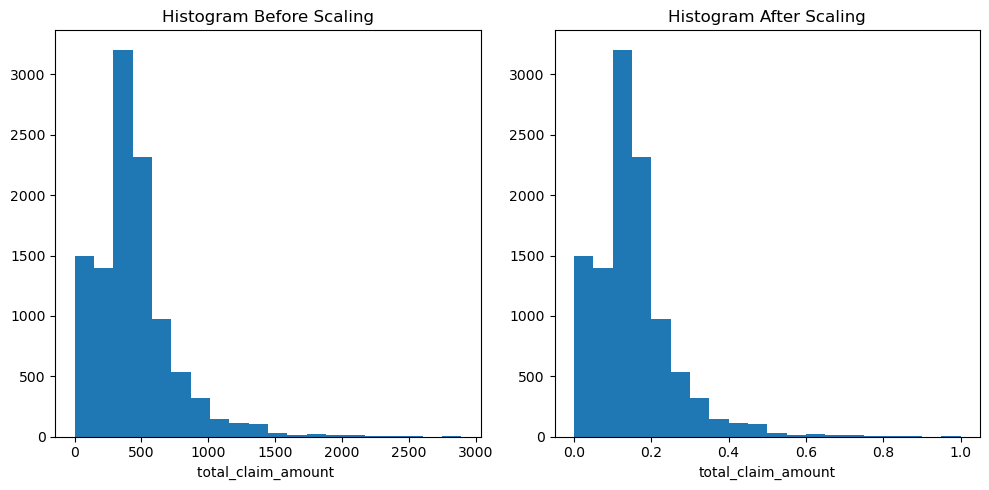

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

# Select the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Plot histograms before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(numerical_columns['total_claim_amount'], bins=20)
plt.title('Histogram Before Scaling')
plt.xlabel('total_claim_amount ')

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns)

# Plot histograms after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_df['total_claim_amount'], bins=20)
plt.title('Histogram After Scaling')
plt.xlabel('total_claim_amount')

plt.tight_layout()
plt.show()

### 2. varB
Use StandardScaler or PowerTransform to reduce the skew and standardize varB's distribution.
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

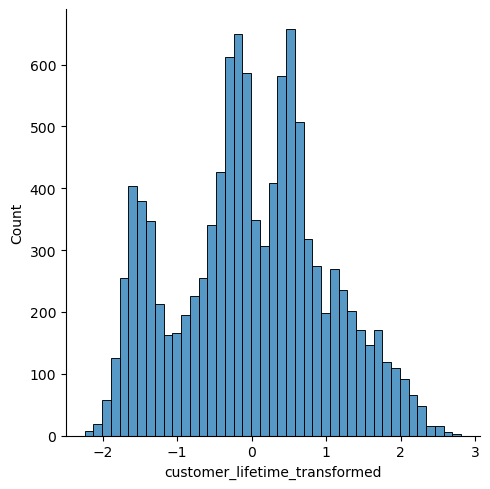

In [130]:

from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()

numerical['customer_lifetime_transformed'] = transformer.fit_transform(numerical[['customer_lifetime_value']])

sns.displot(numerical.customer_lifetime_transformed)
